#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Loading Dataset

from csv to pandas DataFrame

In [ ]:
dataset = pd.read_csv("cardata.csv")

In [ ]:
#inspecting first five rows
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Checking the size

In [ ]:
dataset.shape

(301, 9)

Getting the information about the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking missing values if any

In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

This dataset does not have any missing value

checking distribution of categorical data

In [ ]:
# this will give us the number of values of petrol and deisel
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Encoding the data

converting the categorical data into numerical value

In [ ]:
#encoding the Fuel_Type column
dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)

#encoding the Seller_Type column
dataset.replace({'Seller_Type':{'Dealer': 0, 'Individual':1}}, inplace=True)

#encoding the Transmission column
dataset.replace({'Transmission':{'Manual': 0, 'Automatic':1}}, inplace=True)

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Splitting the data and target

and removing car name and
putting sellingprice in y

In [ ]:
X = dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = dataset['Selling_Price']

In [ ]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#Splitting Training and Test data

using 10% of data for testing as the size of data is less

`random_state` simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 2 )

#Model Training
Linear Regression

normal linear funct

*y = mx + c*

In [ ]:
#loading the model
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

##Model Evaluation

In [ ]:
#prediction on Training data
train_prediction = model.predict(X_train)


comparing with original data

`r2_score` metric provides an indication of the goodness of fit of a set of predictions to the actual values

In [ ]:
#R squared Error
error_score = metrics.r2_score(y_train, train_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8799451660493711


# Visuaizing the actual prices

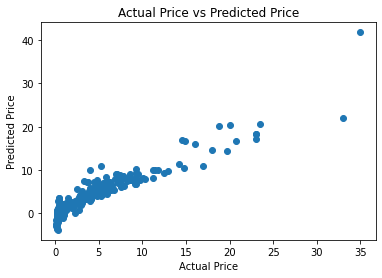

In [ ]:
plt.scatter(y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Testing with Test Data

In [ ]:
#prediction on Test data
test_prediction = model.predict(X_test)


In [ ]:
#R squared Error
error_score = metrics.r2_score(y_test, test_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8365766715027051


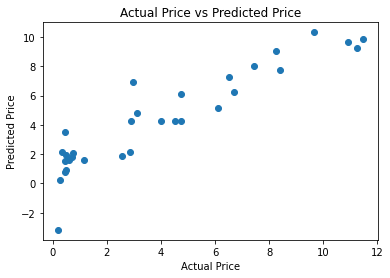

In [ ]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

#Using Lasso Regression

#Model Training


In [ ]:
#loading the model
Lass_model = Lasso()

In [ ]:
Lass_model.fit(X_train,y_train)

Lasso()

##Model Evaluation

In [ ]:
#prediction on Training data
train_prediction = Lass_model.predict(X_train)


comparing with original data


In [ ]:
#R squared Error
error_score = metrics.r2_score(y_train, train_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8427856123435794


# Visuaizing the actual prices

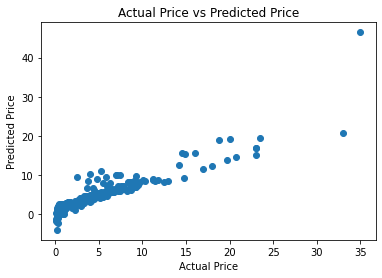

In [ ]:
plt.scatter(y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Testing with Test Data

In [ ]:
#prediction on Test data
test_prediction = Lass_model.predict(X_test)


In [ ]:
#R squared Error
error_score = metrics.r2_score(y_test, test_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8709167941173195


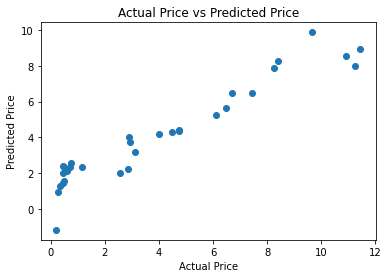

In [ ]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()